In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math

## Q1

In [20]:
t = symbols('t')
theta1 = Function(r"\theta_1")(t)
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1, t, t)

theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)


alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({theta1: symbols(r"\theta_1"),
              theta1_dot: symbols(r"\dot{\theta_1}"),
              theta1_ddot: symbols(r"\ddot{\theta_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}")
             })

In [21]:
# Q1

# a
L1 = symbols('L1')
L2 = symbols('L2')

DH1 = [0, 0, 0, theta1]
T01 = Tlink(DH1)
symprint('T', 0, 1)
matprint(T01, alias)

DH2 = [L1, -pi/2, 0, theta2]
T12 = Tlink(DH2)
symprint('T', 1, 2)
matprint(T12, alias)

DH3 = [L2, 0, 0, 0]
T23 = Tlink(DH3)
symprint('T', 2, 3)
matprint(T23, alias)

T02 = simplify(T01 * T12)
symprint('T', 0, 2)
matprint(T02, alias)


^0T_1

Matrix([
[cos(\theta_1), -sin(\theta_1), 0, 0],
[sin(\theta_1),  cos(\theta_1), 0, 0],
[            0,              0, 1, 0],
[            0,              0, 0, 1]])

^1T_2

Matrix([
[ cos(\theta_2), -sin(\theta_2), 0, L1],
[             0,              0, 1,  0],
[-sin(\theta_2), -cos(\theta_2), 0,  0],
[             0,              0, 0,  1]])

^2T_3

Matrix([
[1, 0, 0, L2],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

^0T_2

Matrix([
[cos(\theta_1)*cos(\theta_2), -sin(\theta_2)*cos(\theta_1), -sin(\theta_1), L1*cos(\theta_1)],
[sin(\theta_1)*cos(\theta_2), -sin(\theta_1)*sin(\theta_2),  cos(\theta_1), L1*sin(\theta_1)],
[             -sin(\theta_2),               -cos(\theta_2),              0,                0],
[                          0,                            0,              0,                1]])

In [22]:
# b
T03 = simplify(T01 * T12 * T23)
symprint('T', 0, 3)
matprint(T03, alias)


^0T_3

Matrix([
[cos(\theta_1)*cos(\theta_2), -sin(\theta_2)*cos(\theta_1), -sin(\theta_1), (L1 + L2*cos(\theta_2))*cos(\theta_1)],
[sin(\theta_1)*cos(\theta_2), -sin(\theta_1)*sin(\theta_2),  cos(\theta_1), (L1 + L2*cos(\theta_2))*sin(\theta_1)],
[             -sin(\theta_2),               -cos(\theta_2),              0,                     -L2*sin(\theta_2)],
[                          0,                            0,              0,                                     1]])

In [23]:
# c
print(np.degrees(np.arctan2(0, 1)))

0.0


In [24]:
# d

omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])


omega_11, v_11 = revolute_joint(frame = 1, 
                                theta_dot = theta1_dot, 
                                transform_low_high = T01, 
                                omega = omega, v = v, 
                                alias = alias)

omega_22, v_22 = revolute_joint(frame = 2, 
                                theta_dot = theta2_dot, 
                                transform_low_high = T12, 
                                omega = omega_11, v = v_11, 
                                alias = alias)

omega_33, v_33 = revolute_joint(frame = 'e', 
                                theta_dot = '', 
                                transform_low_high = T23, 
                                omega = omega_22, v = v_22, 
                                alias = alias)

Jee, J0 = Jacobian(parameters = [theta1_dot, theta2_dot], 
                   v_ee = v_33, 
                   omega_ee = omega_33, 
                   transform_low_high = T03,
                   alias = alias)

^1\Omega_1

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^1V_1

Matrix([
[0],
[0],
[0]])

^2\Omega_2

Matrix([
[-\dot{\theta_1}*sin(\theta_2)],
[-\dot{\theta_1}*cos(\theta_2)],
[               \dot{\theta_2}]])

^2V_2

Matrix([
[                0],
[                0],
[L1*\dot{\theta_1}]])

^e\Omega_e

Matrix([
[-\dot{\theta_1}*sin(\theta_2)],
[-\dot{\theta_1}*cos(\theta_2)],
[               \dot{\theta_2}]])

^eV_e

Matrix([
[                                     0],
[                     L2*\dot{\theta_2}],
[\dot{\theta_1}*(L1 + L2*cos(\theta_2))]])

^eJ_e

Matrix([
[                    0,  0],
[                    0, L2],
[L1 + L2*cos(\theta_2),  0],
[       -sin(\theta_2),  0],
[       -cos(\theta_2),  0],
[                    0,  1]])

^0J_

Matrix([
[-(L1 + L2*cos(\theta_2))*sin(\theta_1), -L2*sin(\theta_2)*cos(\theta_1)],
[ (L1 + L2*cos(\theta_2))*cos(\theta_1), -L2*sin(\theta_1)*sin(\theta_2)],
[                                     0,               -L2*cos(\theta_2)],
[                                     0,                  -sin(\theta_1)],
[                                     0,                   cos(\theta_1)],
[                                     1,                               0]])

In [25]:
J0.subs({theta1: pi/2, theta2: pi/2, theta1_dot: 1, theta2_dot: 2})

Matrix([
[-L1,   0],
[  0, -L2],
[  0,   0],
[  0,  -1],
[  0,   0],
[  1,   0]])

In [26]:
J0.subs({theta1: pi/2, theta2: pi/2, theta1_dot: 1, theta2_dot: 2}) * Matrix([1,2])

Matrix([
[  -L1],
[-2*L2],
[    0],
[   -2],
[    0],
[    1]])

## Qn 2

In [8]:
t = symbols('t')
theta1 = Function(r"\theta_1")(t)
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1, t, t)

theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)


alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({theta1: symbols(r"\theta_1"),
              theta1_dot: symbols(r"\dot{\theta_1}"),
              theta1_ddot: symbols(r"\ddot{\theta_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}")
             })

In [9]:
# a
theta1 = symbols('\\theta_1')
theta2 = symbols('\\theta_2')
theta3 = symbols('\\theta_3')
L1 = symbols('L1')
L2 = symbols('L2')
L3 = symbols('L3')
d3 = symbols('d3')

DH1 = [0, 0, L1, theta1]
T01 = Tlink(DH1)
symprint('T', 0, 1)
matprint(T01, alias)

DH2 = [0, -pi/2, 0, theta2]
T12 = Tlink(DH2)
symprint('T', 1, 2)
matprint(T12, alias)

DH3 = [L2, -pi/2, 0, theta3]
T23 = Tlink(DH3)
symprint('T', 2, 3)
matprint(T23, alias)

DH4 = [L3, 0, d3, 0]
T34 = Tlink(DH4)
symprint('T', 3, 4)
matprint(T34, alias)

T04 = simplify(T01 * T12 * T23 * T34)
symprint('T', 0,  4)
matprint(T04, alias)

^0T_1

Matrix([
[cos(\theta_1), -sin(\theta_1), 0,  0],
[sin(\theta_1),  cos(\theta_1), 0,  0],
[            0,              0, 1, L1],
[            0,              0, 0,  1]])

^1T_2

Matrix([
[ cos(\theta_2), -sin(\theta_2), 0, 0],
[             0,              0, 1, 0],
[-sin(\theta_2), -cos(\theta_2), 0, 0],
[             0,              0, 0, 1]])

^2T_3

Matrix([
[ cos(\theta_3), -sin(\theta_3), 0, L2],
[             0,              0, 1,  0],
[-sin(\theta_3), -cos(\theta_3), 0,  0],
[             0,              0, 0,  1]])

^3T_4

Matrix([
[1, 0, 0, L3],
[0, 1, 0,  0],
[0, 0, 1, d3],
[0, 0, 0,  1]])

^0T_4

Matrix([
[sin(\theta_1)*sin(\theta_3) + cos(\theta_1)*cos(\theta_2)*cos(\theta_3),  sin(\theta_1)*cos(\theta_3) - sin(\theta_3)*cos(\theta_1)*cos(\theta_2), -sin(\theta_2)*cos(\theta_1), L2*cos(\theta_1)*cos(\theta_2) + L3*(sin(\theta_1)*sin(\theta_3) + cos(\theta_1)*cos(\theta_2)*cos(\theta_3)) - d3*sin(\theta_2)*cos(\theta_1)],
[sin(\theta_1)*cos(\theta_2)*cos(\theta_3) - sin(\theta_3)*cos(\theta_1), -sin(\theta_1)*sin(\theta_3)*cos(\theta_2) - cos(\theta_1)*cos(\theta_3), -sin(\theta_1)*sin(\theta_2), L2*sin(\theta_1)*cos(\theta_2) + L3*(sin(\theta_1)*cos(\theta_2)*cos(\theta_3) - sin(\theta_3)*cos(\theta_1)) - d3*sin(\theta_1)*sin(\theta_2)],
[                                           -sin(\theta_2)*cos(\theta_3),                                              sin(\theta_2)*sin(\theta_3),               -cos(\theta_2),                                                                      L1 - L2*sin(\theta_2) - L3*sin(\theta_2)*cos(\theta_3) - d3*cos(\theta_2)],
[                     

## Qn 3

In [10]:
# Point A
[xp, yp, zp] = [-2.5, 0, 0]

# Point B
# [xp, yp, zp] = [2.5, 0, 0]

# Coodinate of the camera relative to the cube
X, Y, Z = 0, 0, -10

# Position of camera relative to the universe
T0C = Matrix([[1, 0, 0, X],
              [0, 1, 0, Y], 
              [0, 0, 1, Z],
              [0, 0, 0, 1]])

# Focal length in m
F = symbols('f')

# Coordinate of the object / point in the universe frame
Xp = symbols('x_p')
Yp = symbols('y_p')
Zp = symbols('z_p')

# Camera parameters
CM = Matrix([[F, 0, 0, 0],
             [0, F, 0, 0],
             [0, 0, 1, 0]])

# Coordinate of the object homogeneous form
P0 = Matrix([Xp, Yp, Zp, 1])

RES = CM * T0C ** -1 * P0

# Retina coordinate homogeneous form
homo_retina = RES.subs({F: 2.4,
                        Xp: xp, Yp: yp, Zp: zp})

# Retina coordinate
retina = Matrix([homo_retina[0] / homo_retina[-1],
                 homo_retina[1] / homo_retina[-1]])

retina

Matrix([
[-0.6],
[   0]])

## Qn 4

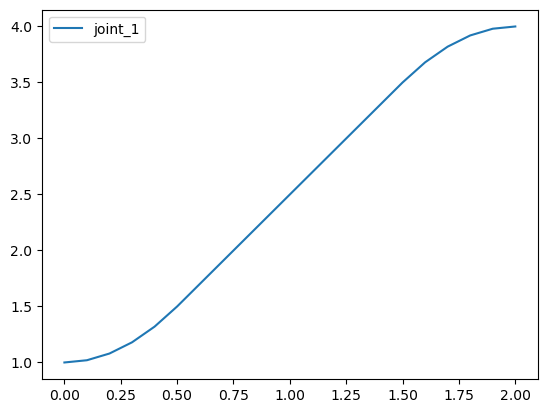

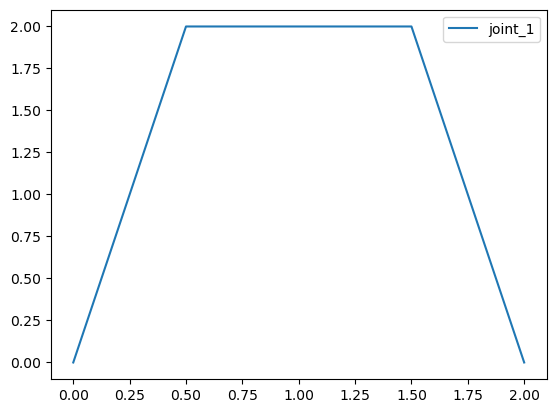

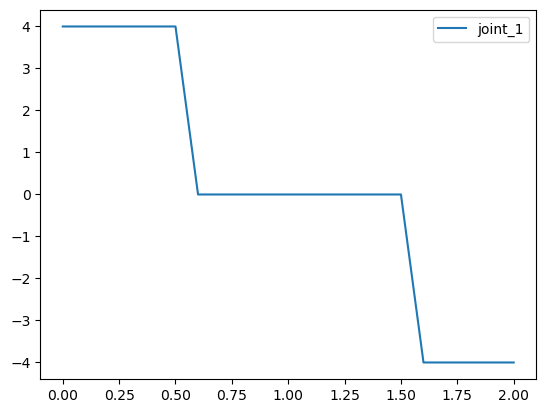

In [11]:
# Parabolic blend trajectory planning

# Provided information

d1 = [1, 4]

disp_lst = [d1]

a_d1 = 4

acc_lst = [a_d1]

# Total motion time is 2s
tf = 2
th = tf/2

# Time step
dt = 0.1
time = np.arange(0, tf + dt, dt)

# Record for all joints
disp_all = []
vel_all = []
acc_all = []

for i in range(len(disp_lst)):
    
    # Get acceleration
    a = acc_lst[i]
    
    # Get displacement, initial and final
    disp_0, disp_f = disp_lst[i]
    
    # Equation 24 (calculate blend time tb)
    tb = th - np.sqrt(a**2 * th**2 - a * (disp_f - disp_0)) / a
    
    # Calculate V
    V = a * tb
    
    # Empty lists for displacement, velocity and acceleration 
    disp, vel, acc = [], [], []
    
    for t in time:
        
        # Apply Equation 27
        
        if 0 <= t <= tb:
            res_disp = disp_0 + V/(2*tb) * t**2
            
            res_vel = V/tb * t 
            
            res_acc = V/tb
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        elif tb < t <= (tf - tb):
            res_disp = (disp_f + disp_0 - V * tf)/2 + V * t
            
            res_vel = V
            
            res_acc = 0
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        else:
            res_disp = disp_f - a * tf**2/2 + a * tf * t - a/2 * t**2
            
            res_vel = a * tf - a * t
            
            res_acc = -a
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
        
    disp_all.append(disp)
    vel_all.append(vel)
    acc_all.append(acc)

for i in range(len(disp_all)):
    plt.plot(time, disp_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time, vel_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time, acc_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
 

## Qn 5

In [12]:
def Rotation(angle, direction, rad = True):
    if rad == False:
        angle = math.radians(angle)
    
    if direction == 'x':
        R = Matrix([[1, 0, 0],
                      [0, cos(angle), -sin(angle)],
                      [0, sin(angle), cos(angle)]])
    elif direction == 'y':
        R = Matrix([[cos(angle), 0, sin(angle)],
                      [0, 1, 0],
                      [-sin(angle), 0, cos(angle)]])
    elif direction == 'z':
        R = Matrix([[cos(angle), -sin(angle), 0],
                      [sin(angle), cos(angle), 0],
                      [0, 0, 1]])
    return R

In [13]:
Rotation(symbols('theta'), 'z', rad = True)

Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

In [14]:
X = symbols('x0')
Y = symbols('y0')
Z = symbols('zo')
original = Matrix([[1, 0, 0, X],
                  [0, 1, 0, Y], 
                  [0, 0, 1, Z],
                  [0, 0, 0, 1]])

# 1. rotate pi/2 in y
R1 = Rotation(pi/2, 'y', rad = True)
T1 = R1.col_insert(3, Matrix([0, 0, 0]))
T1 = T1.row_insert(3, Matrix([0, 0, 0, 1]).T)

# 2. translate 7 in y
T2 = Matrix([[1, 0, 0, 0],
             [0, 1, 0, 7],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

# 3. rotate theta degree in z
R2 = Rotation(symbols('theta'), 'z', rad = True)
T3 = R2.col_insert(3, Matrix([0, 0, 0]))
T3 = T3.row_insert(3, Matrix([0, 0, 0, 1]).T)


T1 * T2 * T3

Matrix([
[          0,          0, 1, 0],
[ sin(theta), cos(theta), 0, 7],
[-cos(theta), sin(theta), 0, 0],
[          0,          0, 0, 1]])

In [15]:
# Directly add the translation to the first rotational matrix
T1 = R1.col_insert(3, Matrix([0, 7, 0]))
T1 = T1.row_insert(3, Matrix([0, 0, 0, 1]).T)
T1

Matrix([
[ 0, 0, 1, 0],
[ 0, 1, 0, 7],
[-1, 0, 0, 0],
[ 0, 0, 0, 1]])

In [16]:
T1 * T3

Matrix([
[          0,          0, 1, 0],
[ sin(theta), cos(theta), 0, 7],
[-cos(theta), sin(theta), 0, 0],
[          0,          0, 0, 1]])